<a href="https://colab.research.google.com/github/Renato-Eishima/Python_analise_financas/blob/main/Retorno_carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calculando o Retorno de uma carteira de ações

Faça o download dos dados das ações. No caso de Egie3, Sula11, Itsa4, Csan3, 
Abev3, Lren3, Slce3, Bbas3 e B3sa3 do período de '2017-01-01' até hoje.

In [1]:
!pip install -q yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 8.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
acoes = ['EGIE3.SA', 'ITSA4.SA', 'SULA11.SA', 'ABEV3.SA', 'LREN3.SA', 'SLCE3.SA', 'BBAS3.SA', 'CSAN3.SA', 'B3SA3.SA'] 
carteira = pd.DataFrame()
for acao in acoes:
  # print(acao)
  carteira[acao] = yf.download(acao, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
carteira.head()

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA
Date,,,,,,,,,
2017-01-02,19.134184,5.317467,11.952116,13.968291,17.586411,4.431844,21.435804,8.195605,4.571316
2017-01-03,19.875391,5.550633,12.532649,14.250912,18.126013,4.462074,22.416517,8.577258,4.759449
2017-01-04,19.622833,5.583017,12.997073,14.139578,17.966415,4.610206,22.299776,8.581669,4.849302
2017-01-05,19.480082,5.634831,12.969750,14.216656,17.799208,4.737176,22.245289,8.566227,4.790337
2017-01-06,19.238501,5.615401,12.867305,14.096757,17.594009,4.734152,22.486572,8.367680,4.787529


In [5]:
carteira.tail()

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA
Date,,,,,,,,,
2022-02-04,40.779999,10.27,24.020000,14.41,26.200001,47.380001,32.230000,23.309999,14.13
2022-02-07,40.270000,10.13,23.940001,14.29,25.690001,48.500000,31.860001,22.540001,13.70
2022-02-08,40.080002,10.15,24.350000,14.16,25.580000,47.900002,32.200001,22.170000,13.55
2022-02-09,40.500000,9.98,24.940001,14.54,25.910000,48.209999,31.920000,22.360001,14.16
2022-02-10,40.580002,10.07,25.080000,14.64,25.790001,49.180000,32.590000,22.260000,14.02


### Normalização por 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize por 100 e plote os dados em um gráfico (você pode aplicar o método 
'.loc()' ou o '.iloc()'

In [6]:
carteira.iloc[0]

EGIE3.SA     19.134184
ITSA4.SA      5.317467
SULA11.SA    11.952116
ABEV3.SA     13.968291
LREN3.SA     17.586411
SLCE3.SA      4.431844
BBAS3.SA     21.435804
CSAN3.SA      8.195605
B3SA3.SA      4.571316
Name: 2017-01-02 00:00:00, dtype: float64

OU

In [7]:
carteira.loc['2017-01-02']

EGIE3.SA     19.134184
ITSA4.SA      5.317467
SULA11.SA    11.952116
ABEV3.SA     13.968291
LREN3.SA     17.586411
SLCE3.SA      4.431844
BBAS3.SA     21.435804
CSAN3.SA      8.195605
B3SA3.SA      4.571316
Name: 2017-01-02 00:00:00, dtype: float64

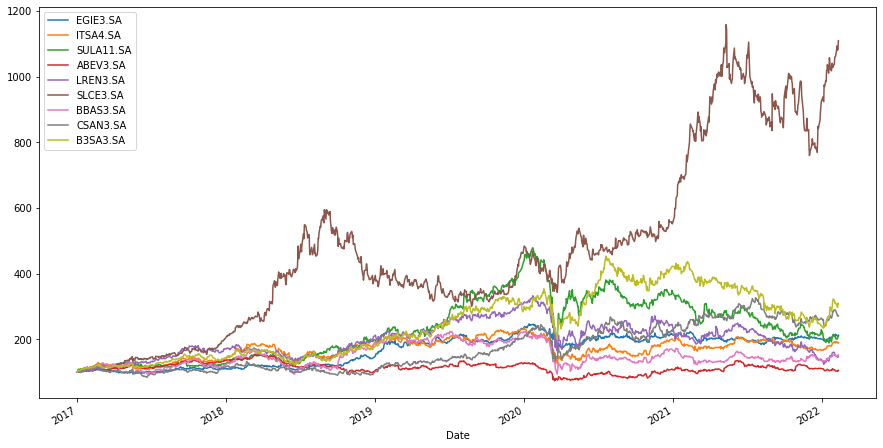

In [8]:
(carteira / carteira.iloc[0]*100).plot(figsize = (15, 8))
plt.show();

### Calculando o retorno de um portifólio de ações

Obtenha o retorno simples de cada ação do portifólio e salve os resultados
em um outro dataframe.

In [9]:
retorno = (carteira / carteira.shift(1)) - 1
retorno.head()

,EGIE3.SA,ITSA4.SA,SULA11.SA,ABEV3.SA,LREN3.SA,SLCE3.SA,BBAS3.SA,CSAN3.SA,B3SA3.SA
Date,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.038737,0.043849,0.048572,0.020233,0.030683,0.006821,0.045751,0.046568,0.041155
2017-01-04,-0.012707,0.005834,0.037057,-0.007812,-0.008805,0.033198,-0.005208,0.000514,0.018879
2017-01-05,-0.007275,0.009281,-0.002102,0.005451,-0.009307,0.027541,-0.002443,-0.001799,-0.012159
2017-01-06,-0.012401,-0.003448,-0.007899,-0.008434,-0.011529,-0.000638,0.010846,-0.023178,-0.000586


Primeiramente assuma um portifolio com pesos iguais. Crie o 'array' com o nome "pesos".

In [10]:
pesos = np.array([0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.112])
pesos

array([0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.112])

In [11]:
np.dot(retorno, pesos)  # para fazer o produto escalar. Porém DÁ erro! OU SEJA, ESTÁ ERRADO!!

array([        nan,  0.03582415,  0.00678434, ..., -0.00312565,
        0.01215087,  0.00505217])

Obtenha o retorno anual de cada ação e depois calcule o produto escalar dos
retornos com os pesos.

In [12]:
retorno_anual = retorno.mean() * 250
retorno_anual

EGIE3.SA     0.177489
ITSA4.SA     0.172904
SULA11.SA    0.217021
ABEV3.SA     0.053657
LREN3.SA     0.159256
SLCE3.SA     0.551814
BBAS3.SA     0.169796
CSAN3.SA     0.269582
B3SA3.SA     0.295399
dtype: float64

In [13]:
np.dot(retorno_anual, pesos)

0.229723192753379

Transforme o resultado em forma de porcentagem

In [15]:
pfolio1 = str(round(np.dot(retorno_anual * 100, pesos), 2)) + "%"
print(pfolio1)

22.97%


OU

In [16]:
print('{}%'.format(round(np.dot(retorno_anual * 100, pesos), 2)))

22.97%


OU

In [17]:
pfolio1 = round(np.dot(retorno_anual * 100, pesos), 2)
print(f'{pfolio1}%')

22.97%


Agora assumindo os pesos conforme a carteira ANTIGA do Dica de Hoje. (DESATUALIZADA)

In [18]:
pesos2 = np.array([0.15, 0.12, 0.15, 0.08, 0.12, 0.10, 0.10, 0.08, 0.1])

In [19]:
pesos2.sum()

1.0

Transforme o resultado em forma de porcentagem

In [20]:
pfolio2 = str(round(np.dot(retorno_anual * 100, pesos2), 2)) + '%'
print(pfolio2)

22.66%


OU

In [22]:
print('{}%'.format(round(np.dot(retorno_anual * 100, pesos2), 2)))

22.66%


OU

In [23]:
pfolio2 = round(np.dot(retorno_anual * 100, pesos2), 2)
print(f'{pfolio2}%')

22.66%
